In [14]:
using PyPlot

In [2]:
#
# (Explicit) 4th order Runge-kutta:
# f  - rhs of differential equation
# df - Jacobian matrix of f (not used)
# t0 - Initial time
# y0 - Initial value
# h  - step length
# T  - right boundary of time interval [t0,T]
#
function runge_kutta(f, t0, y0, h, T)
    d = length(y0)
    N = convert(Int64, floor(T/h))
    
    t = zeros(1, N + 1)
    y = zeros(1, N + 1)

    # Initial values:
    t[1] = t0
    y[1] = y0

    k1(h,t,x) = f(t,x)
    k2(h,t,x) = f(t + 1/2*h, x + 1/2*h*k1(h,t,x))
    k3(h,t,x) = f(t + 1/2*h, x + 1/2*h*k2(h,t,x))
    k4(h,t,x) = f(t + h, x + h*k3(h,t,x))
    
    F(h,t,x) = (k1(h,t,x) + 2*k2(h,t,x) + 2*k3(h,t,x) + k4(h,t,x))/6
    
    for i = 1:N
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h * F(h, t[i], y[i])
    end
    
    return (t, y)
end

runge_kutta (generic function with 1 method)

In [3]:
f(t, x) = -200*t*x^2

f (generic function with 1 method)

In [4]:
# initial values
t0 = -3.
y0 = 1./901

h=0.01
T=30;

In [5]:
ts,ys = runge_kutta(f, t0, y0, h, T);

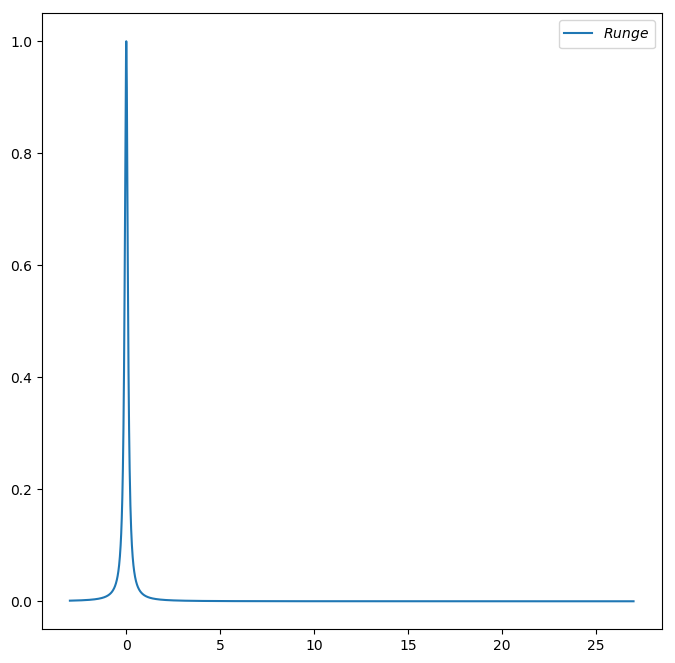

In [6]:
using PyPlot

# Plot y[1,:] and y[2,:] over time:
figure(figsize=(8,8))
plot(ts', ys[1,:], label="\$Runge\$")
legend();

In [7]:
function realSol(g, t0, h, T)
    N = convert(Int64, floor(T/h))
    t = zeros(1, N + 1)
    y = zeros(1, N + 1)
    t[1] = t0
    y[1] = g(t0)
    
    for i = 1:N
        t[i+1] = t[i] + h
        y[i+1] = g(t[i])
    end
    
    return (t,y)
end

realSol (generic function with 1 method)

In [8]:
g(t) = 1/(1+100*t^2)
tr, yr = realSol(g, t0, h, T)

([-3.0 -2.99 … 26.99 27.0], [0.00110988 0.00110988 … 1.37376e-5 1.37274e-5])

In [9]:
N = convert(Int64, floor(T/h))
err = zeros(1, N+1)
err = [abs(ys[i] - yr[i]) for i in 1:N+1]
err = transpose(err)

1×3001 RowVector{Float64,Array{Float64,1}}:
 0.0  7.42804e-6  7.50283e-6  …  1.01891e-8  1.01777e-8  1.01664e-8

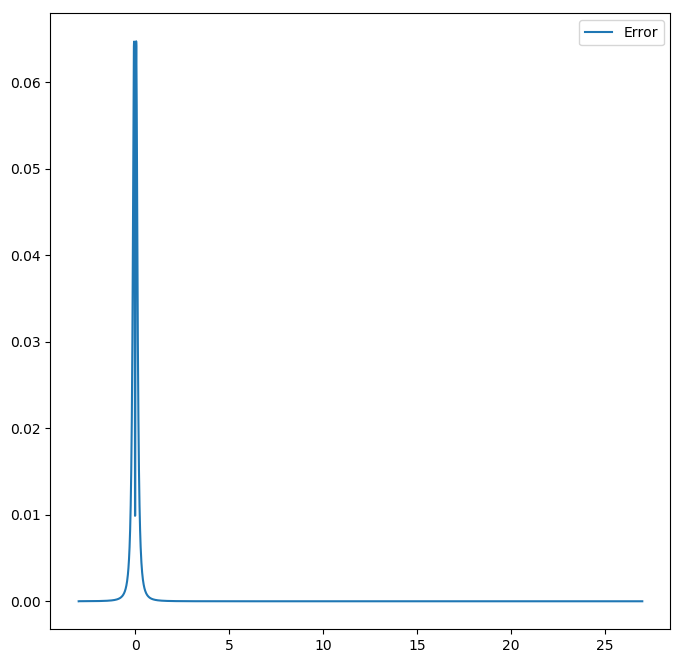

In [15]:
using PyPlot

figure(figsize=(8,8))
plot(tr', err[1,:], label="Error")
legend();

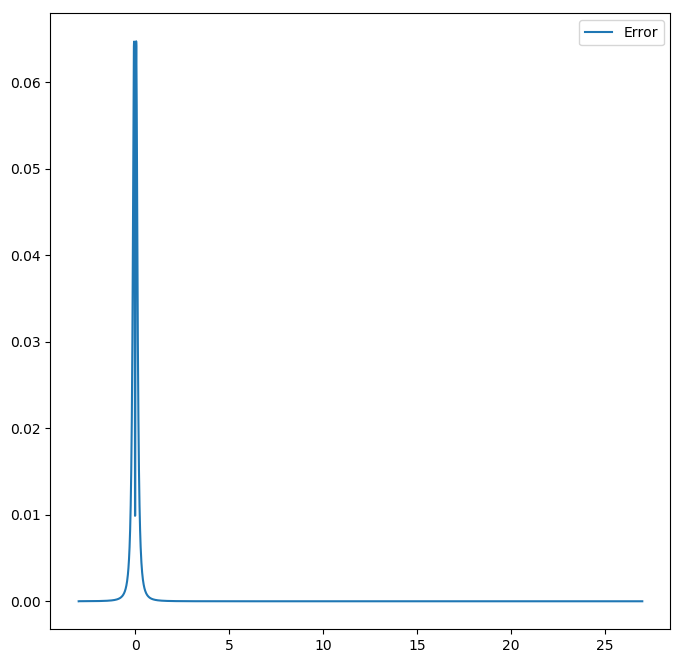

In [16]:
logerr = zeros(1, N+1)
logerr = [log(abs(ys[i] - yr[i])) for i in 1:N+1]
logerr = transpose(logerr)

using PyPlot

figure(figsize=(8,8))
plot(tr', err[1,:], label="Error")
legend();